In [1]:
using Plots;
using LinearAlgebra;


(process:16296): GLib-GIO-WARNING **: 18:55:50.428: Unexpectedly, UWP app `KDEe.V.Okular_21.1202.912.0_x64__7vt06qxq7ptv8' (AUMId `KDEe.V.Okular_7vt06qxq7ptv8!KDEe.V.Okular') supports 5 extensions but has no verbs


To begin, we are given $u''(x) = \sin(x)$, $u'(0) = 1$, and $u(1) = 1$.

In [2]:
u′′(x) = sin(x);
α = 1;
β = 1;

The following system is used to provide a second-order approximation to the solution, using a second-order centered approximation of $u'(0)$. First we set up the tridiagonal matrix $A$:

In [3]:
h = 0.1;
m = Int(1/h);

du = vcat(h, [1 for _ in 2:m]);
d = vcat(-h, [-2 for _ in 2:m], h^2);
dl = vcat([1 for _ in 2:m], 0.0);

A = Tridiagonal(dl, d, du)

11×11 Tridiagonal{Float64, Vector{Float64}}:
 -0.1   0.1    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    ⋅ 
  1.0  -2.0   1.0    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    ⋅ 
   ⋅    1.0  -2.0   1.0    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    ⋅ 
   ⋅     ⋅    1.0  -2.0   1.0    ⋅     ⋅     ⋅     ⋅     ⋅    ⋅ 
   ⋅     ⋅     ⋅    1.0  -2.0   1.0    ⋅     ⋅     ⋅     ⋅    ⋅ 
   ⋅     ⋅     ⋅     ⋅    1.0  -2.0   1.0    ⋅     ⋅     ⋅    ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅    1.0  -2.0   1.0    ⋅     ⋅    ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    1.0  -2.0   1.0    ⋅    ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    1.0  -2.0   1.0   ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    1.0  -2.0  1.0
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    0.0  0.01

Then the right-hand side vector $F$:

In [4]:
F = vcat(α, u′′.(n*h for n in 1:m-1), β)

11-element Vector{Float64}:
 1.0
 0.09983341664682815
 0.19866933079506122
 0.2955202066613396
 0.3894183423086505
 0.479425538604203
 0.5646424733950355
 0.6442176872376911
 0.7173560908995228
 0.7833269096274834
 1.0

Finally, we compute our grid of solutions by solving the system. The solution is plotted below:

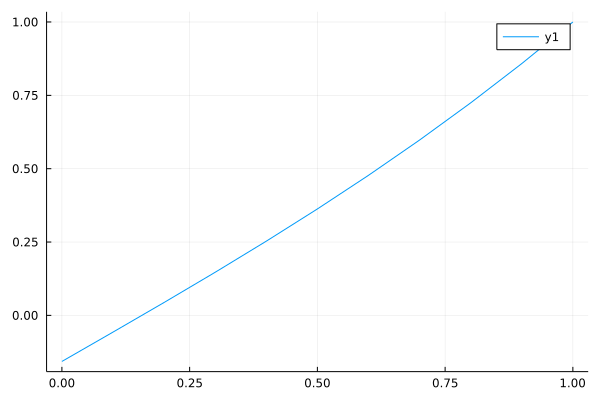

In [5]:
U = (1 / h^2 * A) \ F;
plot(0:h:1, U)

The explicit solution to our problem is $u(x) = 2 x - \sin(x) - 1 + \sin(1)$. We can use this to approximate the error of this method:

In [6]:
u(x) = 2x - sin(x) - 1 + sin(1);
Û = u.(0:h:1);
E = U - Û

11-element Vector{Float64}:
 0.0015350488280637675
 0.0013684654748918612
 0.001202713789593149
 0.0010386171302903258
 0.0008769823186335901
 0.0007185915783048391
 0.0005641947192980834
 0.00041450164606493534
 0.0002701752643845534
 0.0001318248578288106
 0.0

This error is plotted below, and the 2-norm is found:

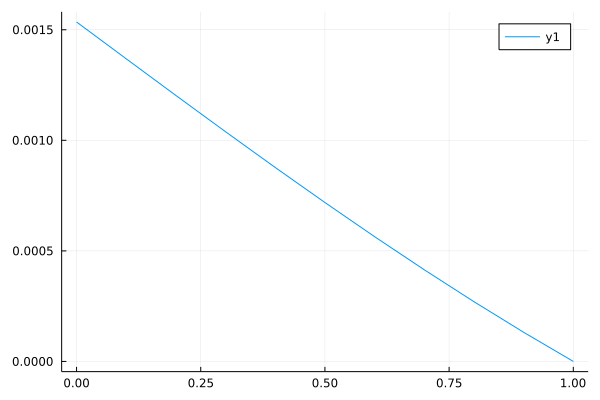

In [7]:
plot(0:h:1, E)

In [8]:
two_norm = √(h * sum(E .^2))

0.0009284551830664097